In [1]:
#Sheen Kak 
#CSCI 185 
#Final project code

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


/Users/sheenkak/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


/var/folders/63/lkqhjsgs2d98kv5tcqc99p0w0000gn/T/ipykernel_14455/228471648.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  mass_data = mass_data.replace({',': ''}, regex=True).apply(pd.to_numeric, errors='ignore')


Covariance matrix:
 [[ 1.0042735   0.15146824  0.88151742 -0.03448903 -0.0602971   0.30092406
   0.08550291 -0.1085044  -0.01876922 -0.03147197  0.12605382  0.01691428
  -0.0169456   0.5705639   0.52175488  0.26138487  0.41245998  0.44397123
   0.44736422  0.39979782 -0.23537817  0.2353724   0.787575    0.07857813]
 [ 0.15146824  1.0042735   0.38745708 -0.01826683  0.24826358  0.21469259
   0.14277686 -0.26957793 -0.08567472  0.11277795 -0.09188974 -0.07513905
   0.07591226  0.35120514  0.33127508  0.17394923  0.2809675   0.32823893
   0.27946998  0.21583611 -0.00401487  0.0040185   0.30060436 -0.04716214]
 [ 0.88151742  0.38745708  1.0042735  -0.0162104   0.04384108  0.37220814
   0.12397245 -0.20170647 -0.06793677  0.00758512  0.05966481  0.01271834
  -0.01215049  0.69345225  0.64743082  0.34286997  0.5470184   0.5811726
   0.54463235  0.46140633 -0.205695    0.20568681  0.88368042  0.05229213]
 [-0.03448903 -0.01826683 -0.0162104   1.0042735   0.59932281 -0.09046669
   0.76731412 -0

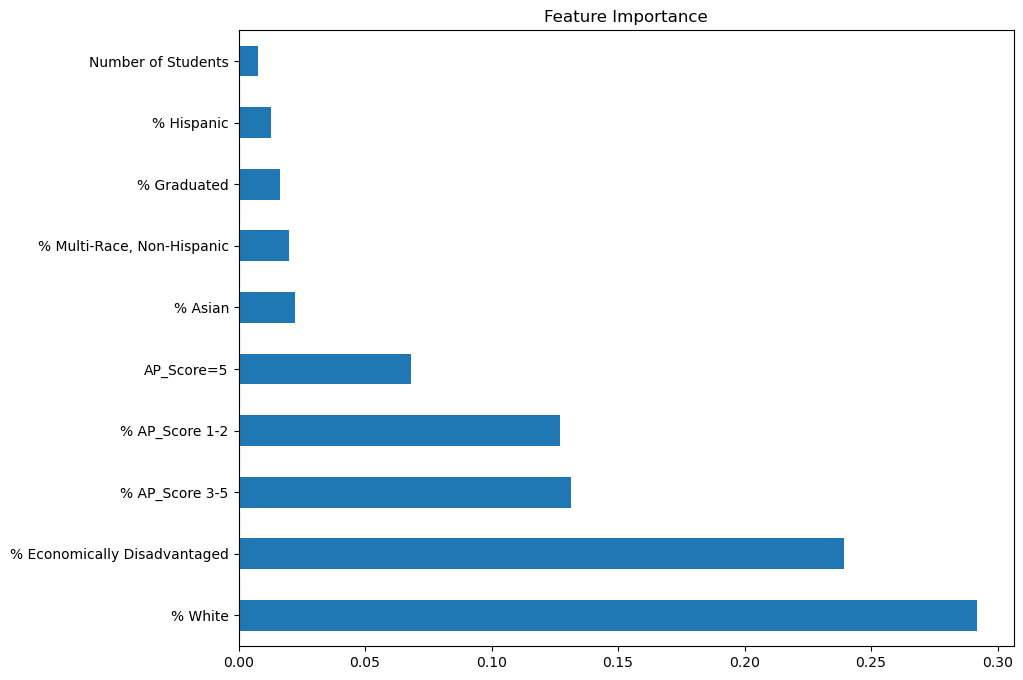

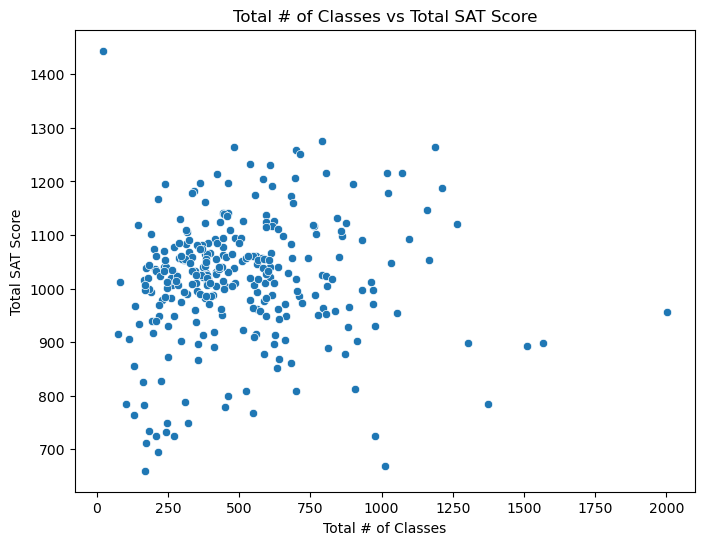

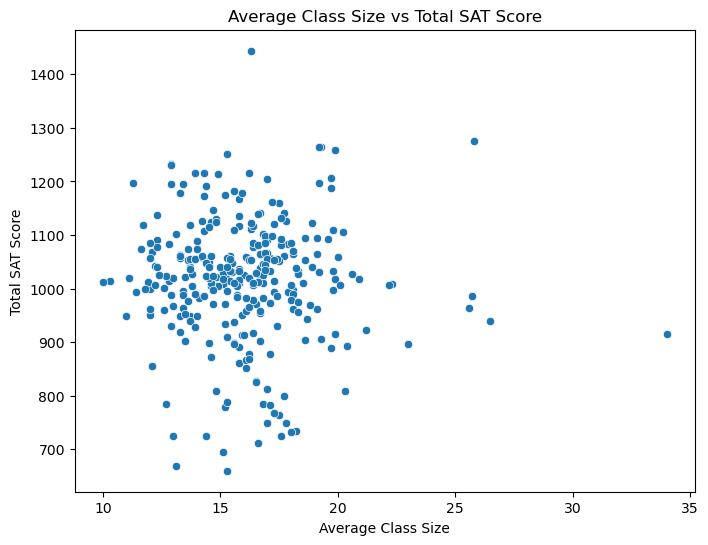

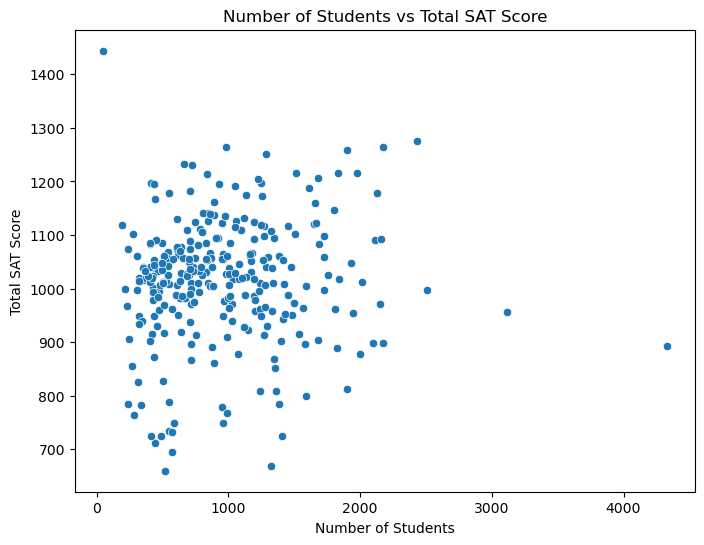

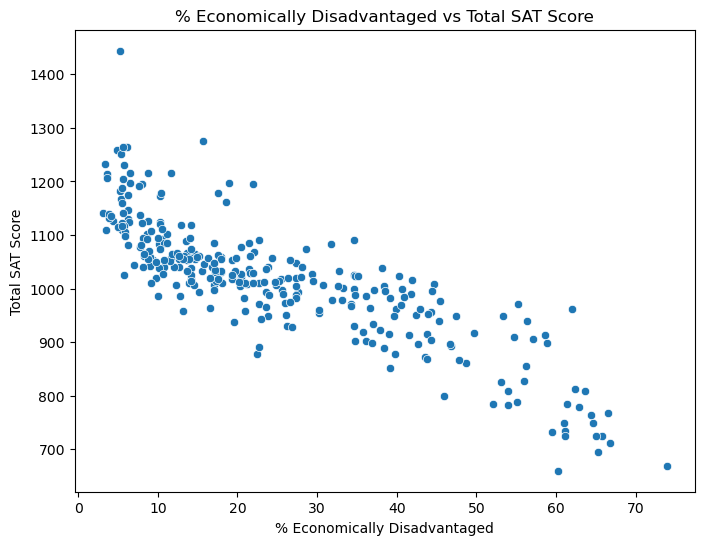

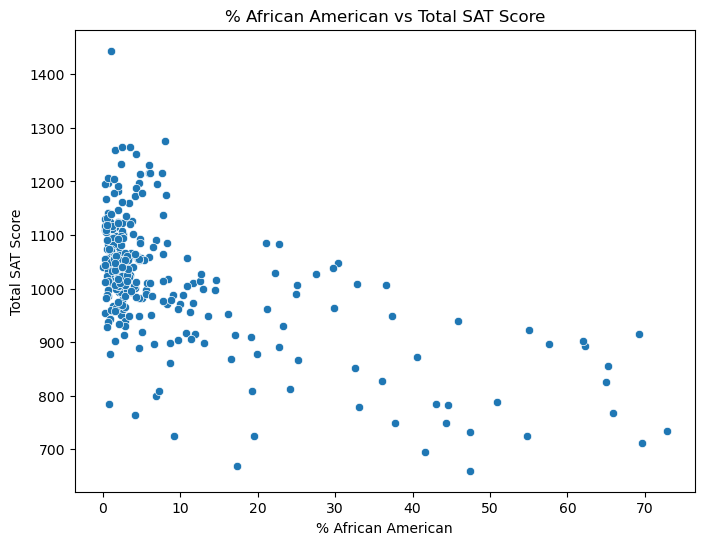

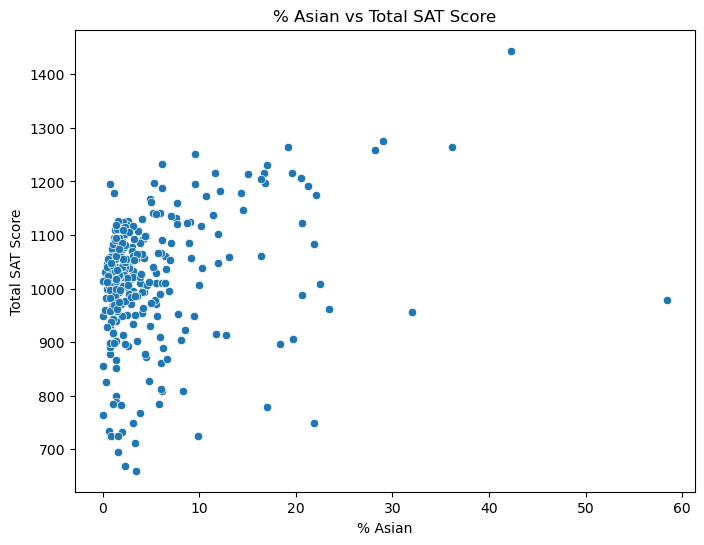

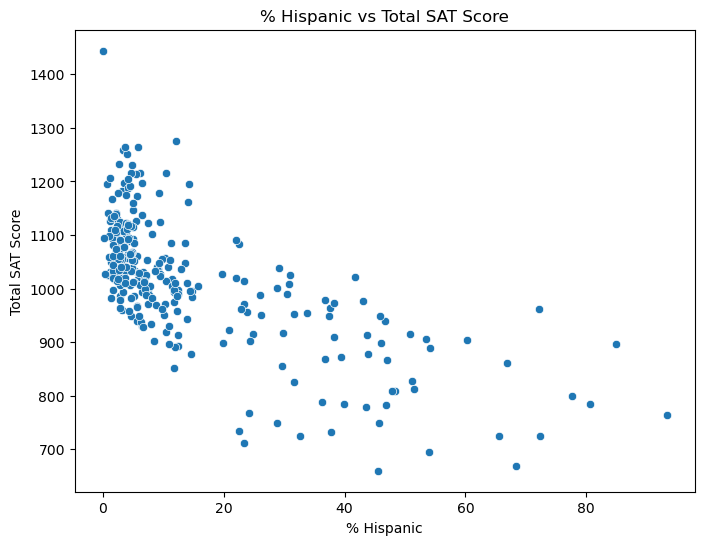

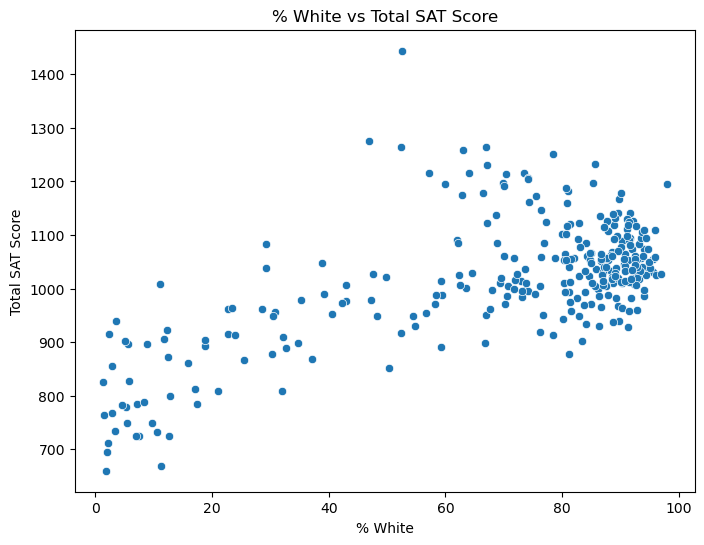

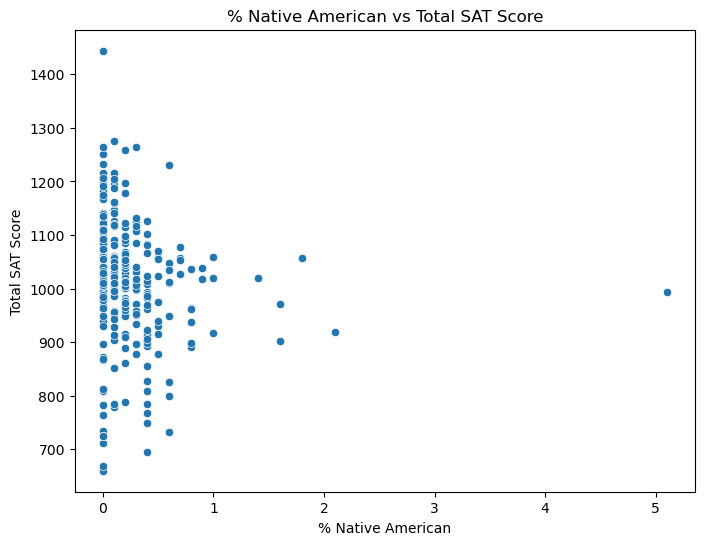

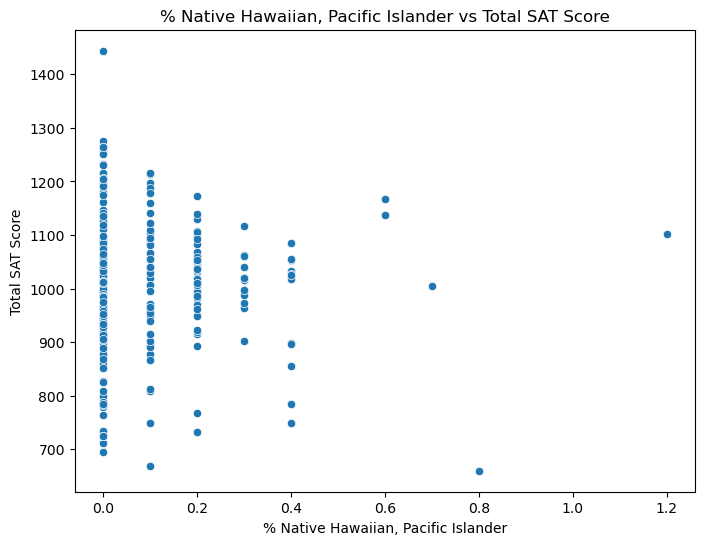

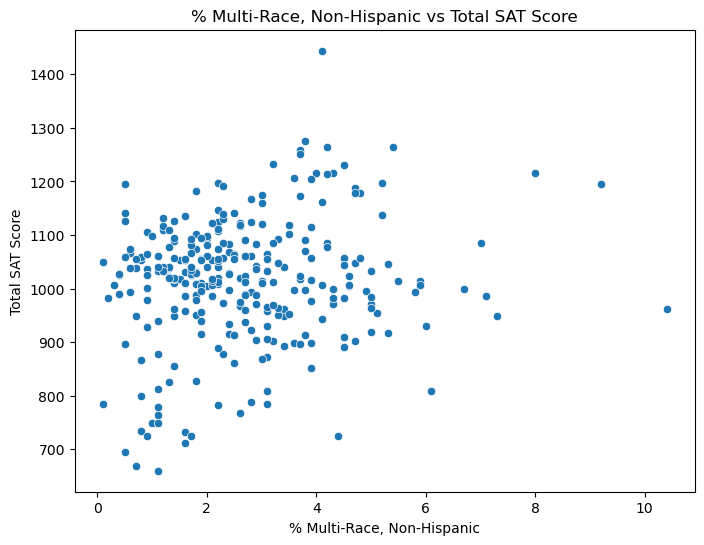

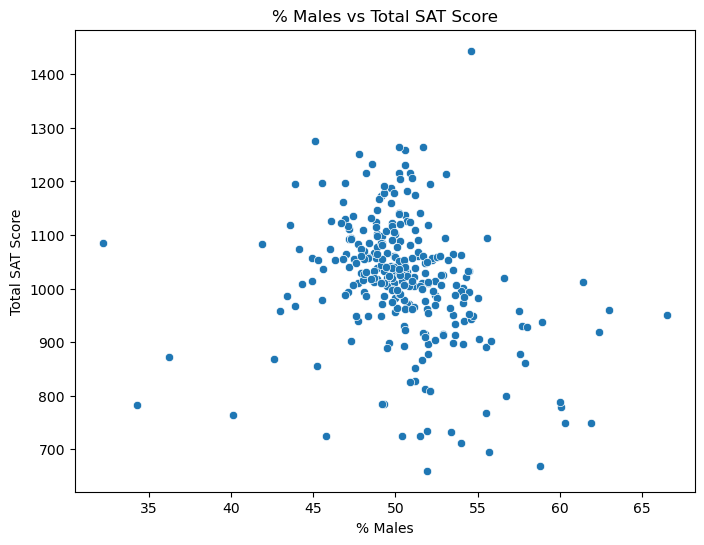

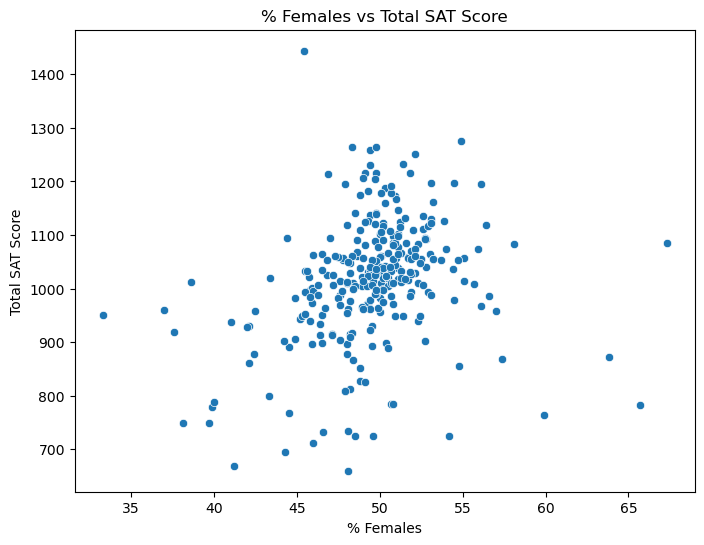

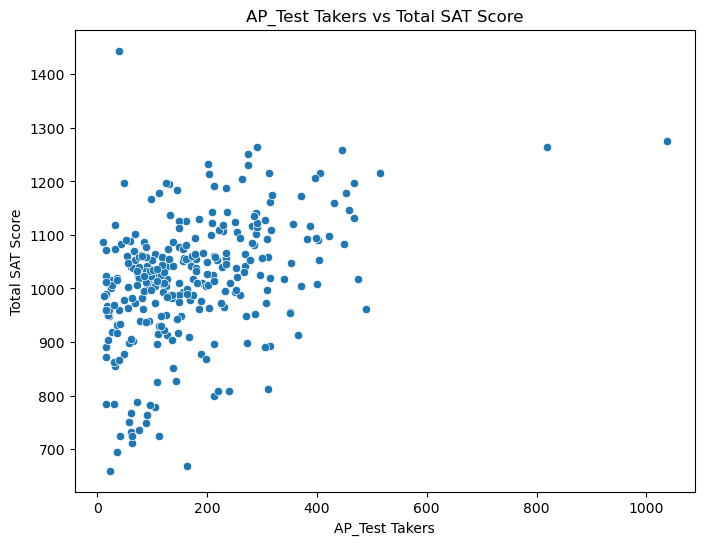

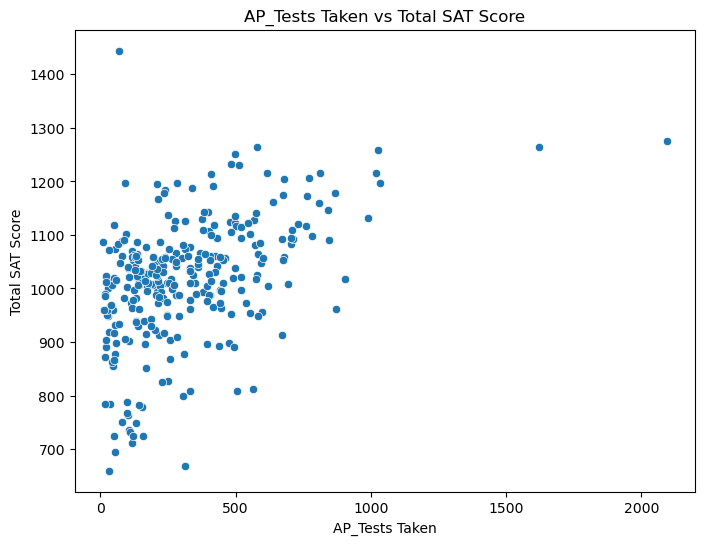

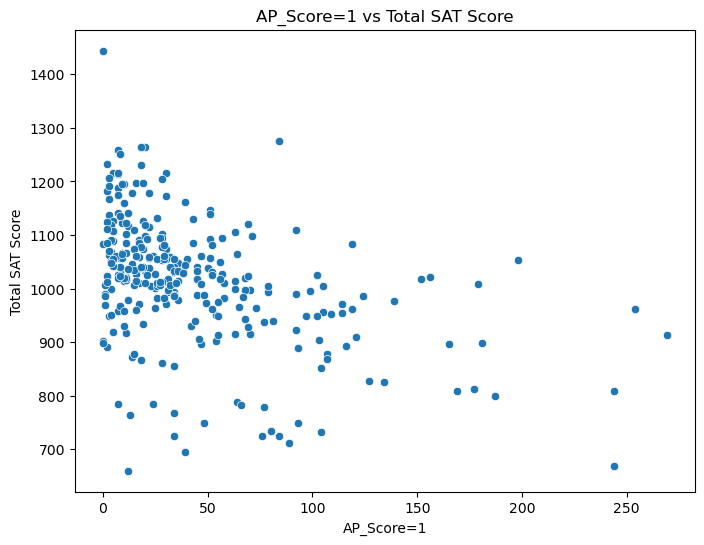

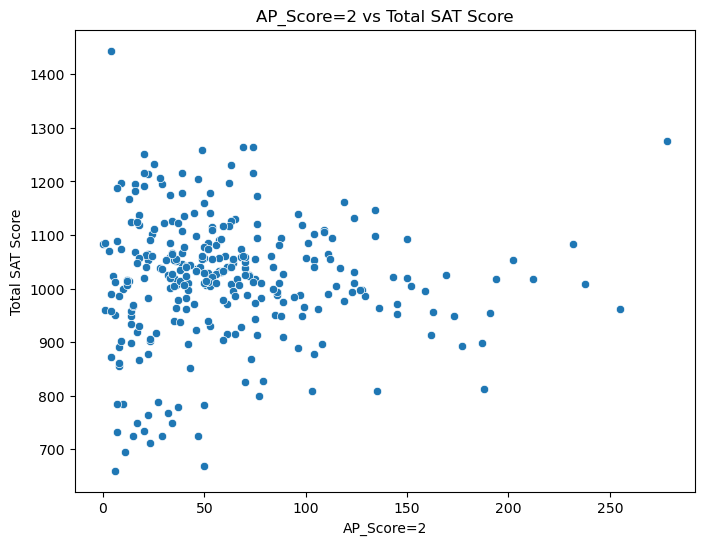

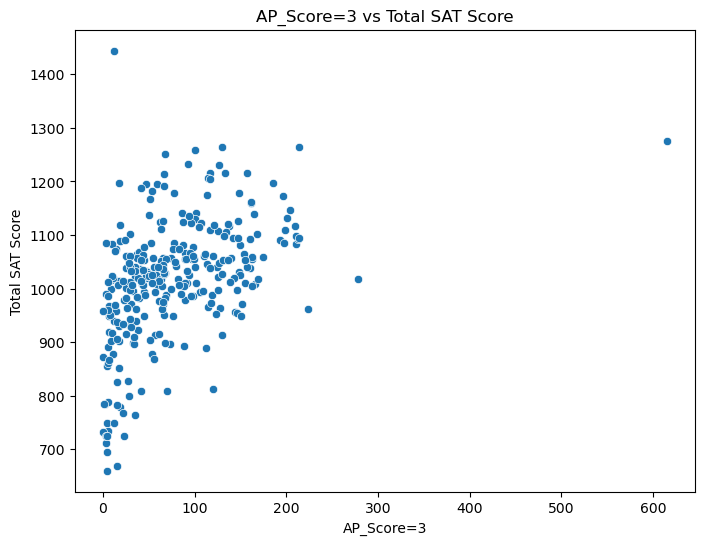

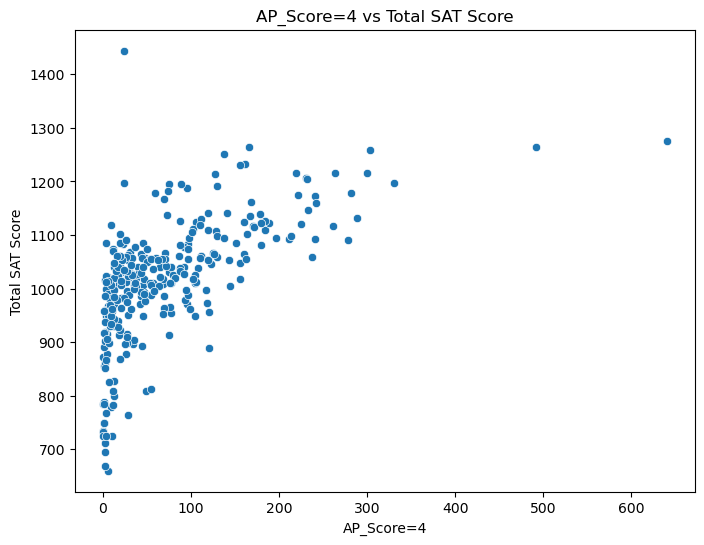

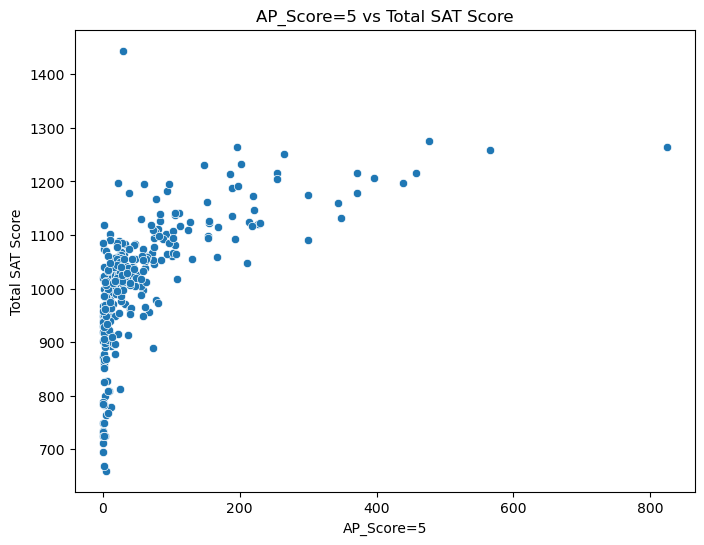

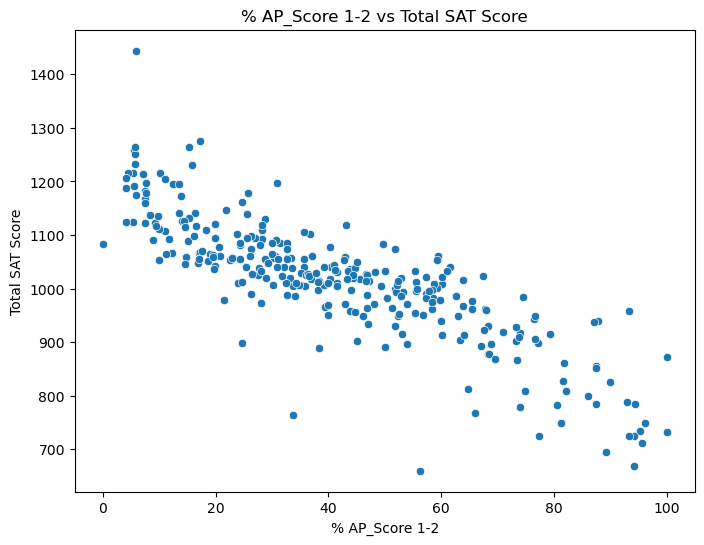

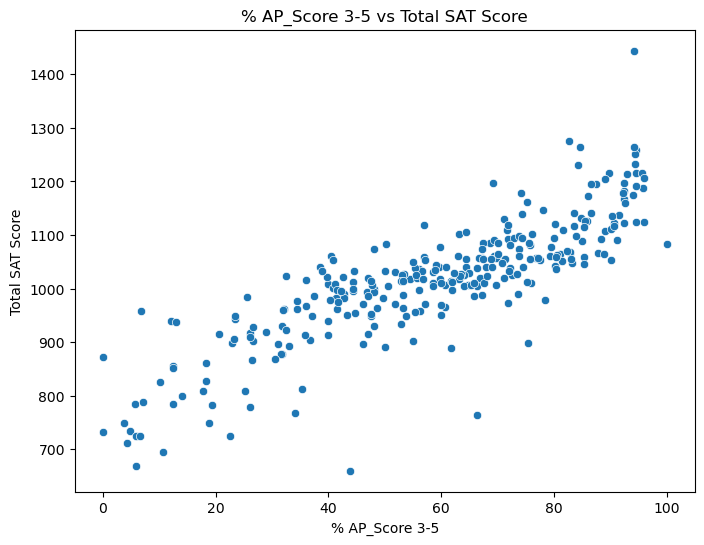

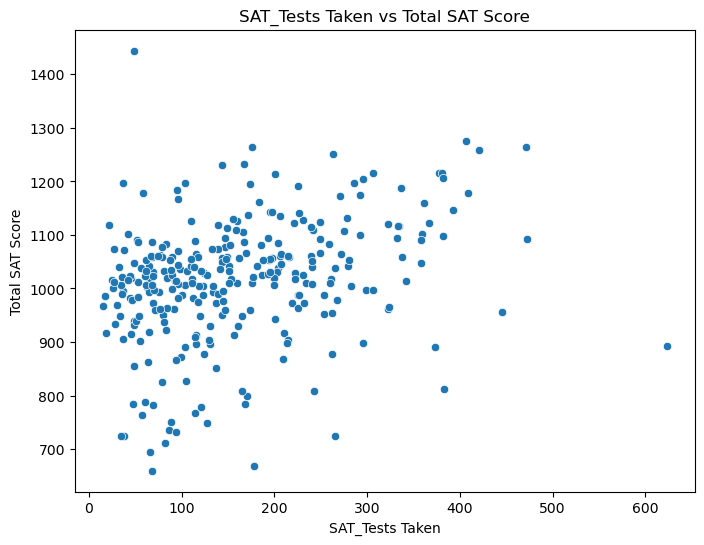

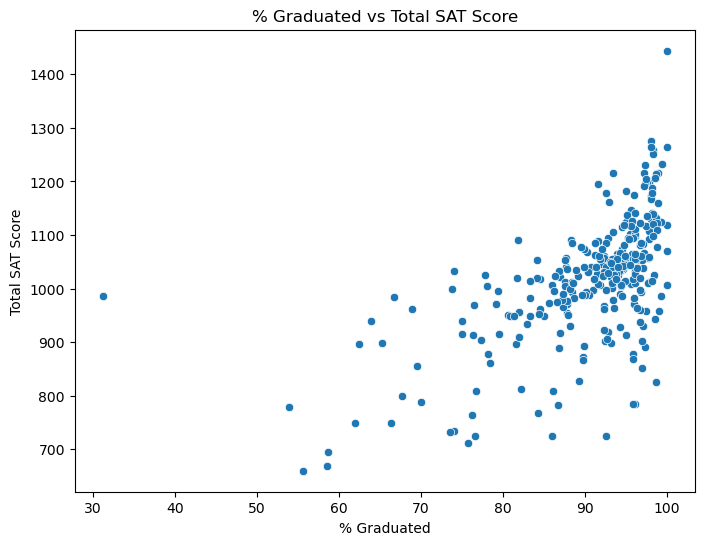

Mean Squared Error: 2018.5055864406786


In [3]:
mass_data = pd.read_csv( 'MA_Public_Schools_2017.csv')

selected_features = ['Total # of Classes', 'Average Class Size', 'Number of Students',
                     '% Economically Disadvantaged', '% African American', '% Asian',
                     '% Hispanic', '% White', '% Native American', '% Native Hawaiian, Pacific Islander',
                     '% Multi-Race, Non-Hispanic', '% Males', '% Females', 'AP_Test Takers',
                     'AP_Tests Taken', 'AP_Score=1', 'AP_Score=2', 'AP_Score=3', 'AP_Score=4',
                     'AP_Score=5', '% AP_Score 1-2', '% AP_Score 3-5', 'SAT_Tests Taken',
                     'Average SAT_Reading', 'Average SAT_Writing', 'Average SAT_Math', '% Graduated']

mass_data = mass_data[selected_features]

mass_data = mass_data.replace({',': ''}, regex=True).apply(pd.to_numeric, errors='ignore')
mass_data = mass_data.dropna(subset=['Average SAT_Reading', 'Average SAT_Writing', 'Average SAT_Math'])
mass_data['Total SAT Score'] = mass_data['Average SAT_Reading'] + mass_data['Average SAT_Math']

mass_data = mass_data.replace([np.inf, -np.inf], np.nan).dropna()

X = mass_data.drop(columns=['Average SAT_Reading', 'Average SAT_Writing', 'Average SAT_Math','Total SAT Score'])
y = mass_data['Total SAT Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cov_matrix = np.cov(X_train_scaled, rowvar=False)
print('Covariance matrix:\n', cov_matrix)

corr_matrix = mass_data.corr()
print('Correlation matrix:\n', corr_matrix)

for column in X_train.columns:
    corr, _ = pearsonr(X_train[column], y_train)
    print(f'Pearson correlation between {column} and Total SAT Score: {corr}')

categorical_features = ['School Type', 'Accountability and Assistance Level']

for feature in categorical_features:
    if feature in mass_data.columns:
        contingency_table = pd.crosstab(mass_data[feature], mass_data['Total SAT Score'])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        print(f'Chi-square test result for {feature}:')
        print(f'Chi2: {chi2}, p-value: {p}')
    else:
        print(f'Feature "{feature}" not found in dataset')

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
importances = pd.Series(model.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 8))
importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

for column in X_train.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=mass_data, x=column, y='Total SAT Score')
    plt.title(f'{column} vs Total SAT Score')
    plt.show()

for feature in categorical_features:
    if feature in mass_data.columns:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=feature, y='Total SAT Score', data=mass_data)
        plt.title(f'{feature} vs Total SAT Score')
        plt.show()

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
